In [42]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [45]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/Hawaii.sqlite", echo=False)

In [46]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables


['measurement', 'station']

In [48]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [59]:
# Create our session (link) from Python to the DB
session = Session(engine) 


# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.

lastdate = session.query(Measurement.date, func.max(Measurement.date)).all()


,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2218,2016-08-24,2.28
2219,2016-08-24,NaN
2220,2016-08-24,1.22
2221,2016-08-24,2.15


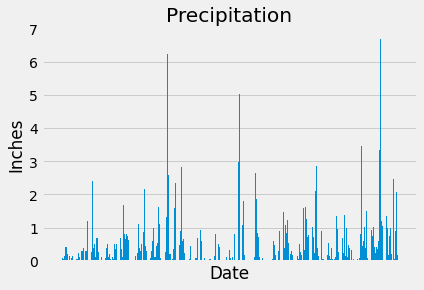

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last12 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by((Measurement.date).desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last12, columns=['date','prcp'])
df


# Sort the dataframe by date
# already did this 


# Use Pandas Plotting with Matplotlib to plot the data
x = df["date"]
y = df["prcp"]
plt.bar(x,y)
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks([], [],
       rotation=20)

df


In [96]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station, func.count(Station.station)).all()


[('USC00519397', 9)]

In [105]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
  group_by(Measurement.station).all()


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min = session.query(Measurement.tobs, func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

max = session.query(Measurement.tobs, func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

avg = session.query(Measurement.tobs, func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

min, max, avg



([(54.0, 54.0)], [(85.0, 85.0)], [(70.0, 71.66378066378067)])

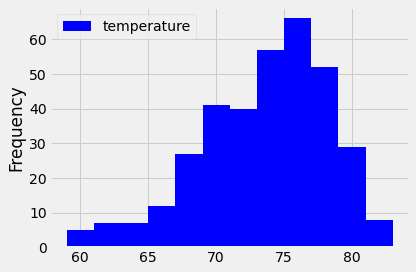

In [124]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last12temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()

lastdf = pd.DataFrame(last12temp, columns=['date','temperature'])

lastdf.plot.hist(bins=12, color='#0000FF')
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()